In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
#data <- read.csv("C:/Users/p0p/Desktop/anaomaly/Example-3.csv", sep=",")

In [2]:
data =  pd.read_csv("C:/Users/p0p/Desktop/anaomaly/1.csv")

In [3]:
data['time'] = pd.to_datetime(data.time)
data = data.set_index('time') 
#data['new_col'] = data['value'].rolling(144).mean()

In [4]:
#data.loc['20121201']['value'].values
#data.loc['20140501']

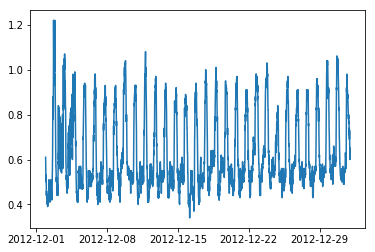

In [5]:
plt.plot(data[-4330:])

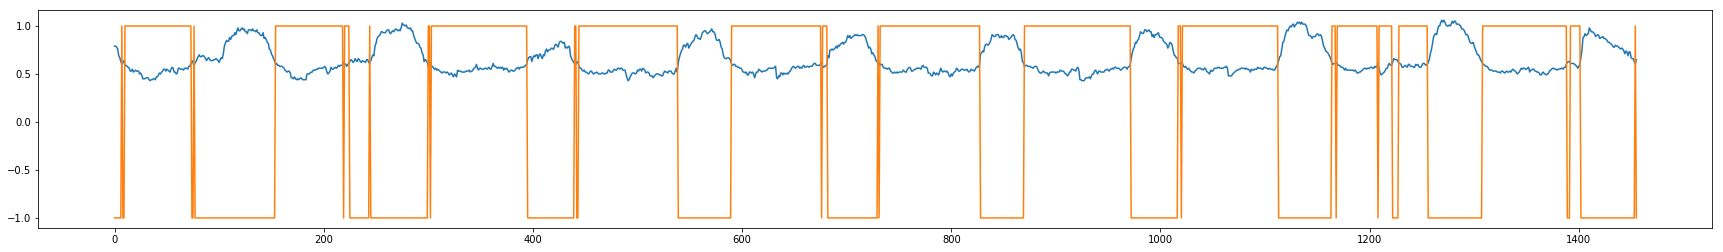

In [7]:
x = (data['value'].values)
op = 20000
abc = OneClassSVM()
abc.fit(x.reshape(-1, 1)[0:op])
from sklearn import metrics  
preds = abc.predict(x.reshape(-1, 1)[op:]) 
fig1 = plt.figure() 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 300
fig_size[1] = 4
plt.plot(data[op:].values)
plt.plot(preds)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


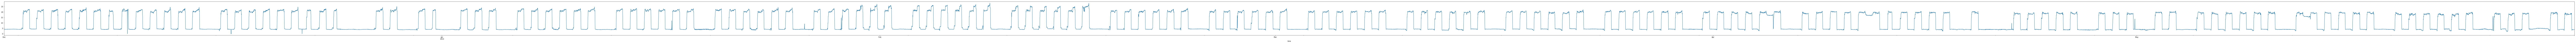

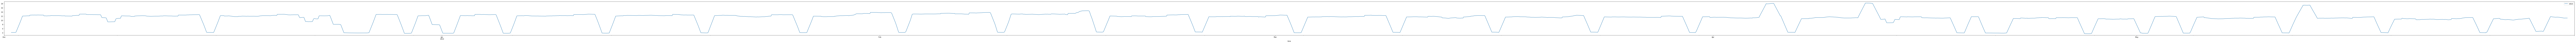

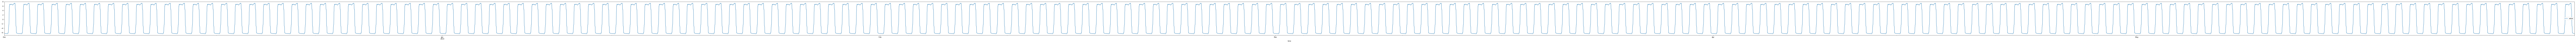

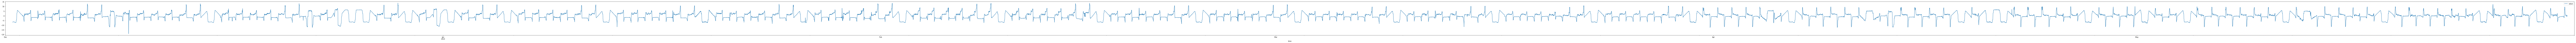

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
#ax = data.loc['20121203':'20121210']['value'].plot(figsize=(30, 4),style='k--')
ax = data['value'].plot(figsize=(300, 4))
#data['new_col'].plot(ax = ax)
res = seasonal_decompose(data, model='additive', freq = 144)
fig = plt.figure() 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 300
fig_size[1] = 4
res.trend.plot()
res.seasonal.plot()
res.resid.plot()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


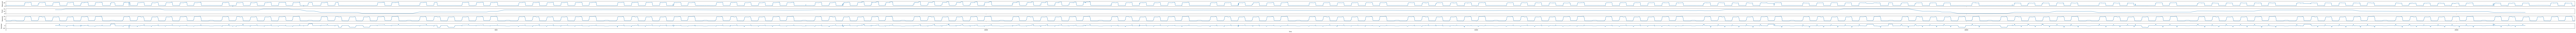

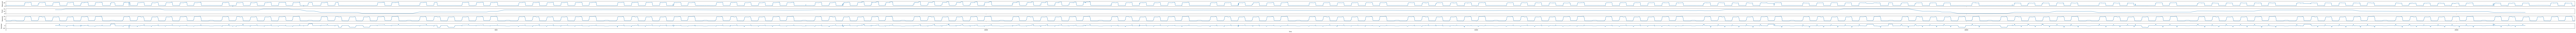

In [23]:
def smooth(x,window_len=0,window='hanning'):

    if window_len<3:
        return x

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
   # y = np.append(np.zeros(window_len) ,y) 
    return y
x = data['value'].values
y=smooth(x)
z = np.append(np.zeros(72) ,x) 
#plt.plot(y)
res2 = seasonal_decompose(y, model='additive', freq = 144*7)
res2.plot()

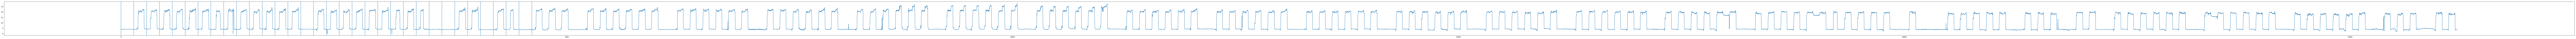

In [24]:
plt.plot(y)
j = 0
for i in range(1,34):
    plt.axvline(x=j)
    j = j + 144

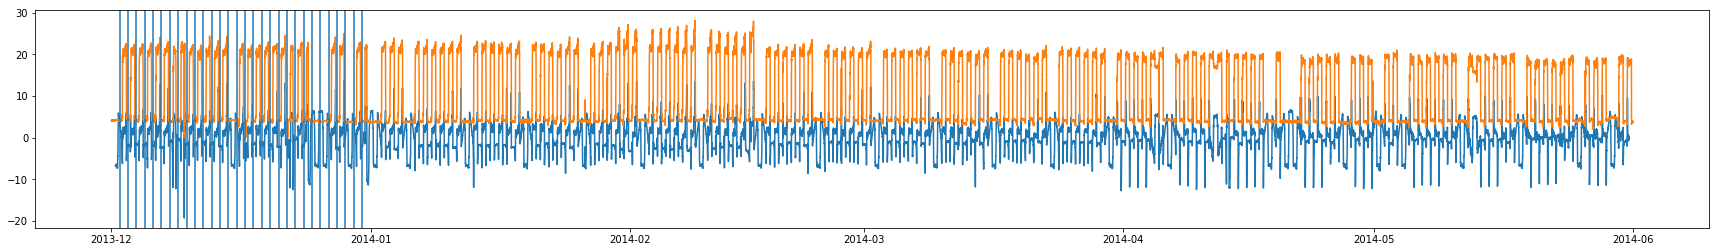

In [25]:
plt.figure(figsize=(30,4))
plt.plot(res.resid)
plt.plot(data)
j = 0
for i in range(1,31):
    j = j + 144
    plt.axvline(x=data.index[j])

In [26]:
from sklearn.cluster import KMeans
X = np.array(data).reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
kmeans.labels_ *= 2

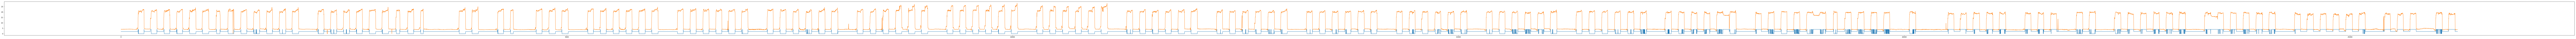

In [28]:
figs = plt.figure() 
figs_size = plt.rcParams["figure.figsize"]
figs_size[0] = 300
figs_size[1] = 4
plt.plot(kmeans.labels_)
plt.plot(data['value'].values)

In [29]:
for i, j in enumerate(kmeans.labels_):
    if j == 3:
        print(data)

In [30]:
#from statsmodels.nonparametric.smoothers_lowess import lowess
#filtered = lowess(data['value'].values, np.arange(1,len(data['value'].values)+1), is_sorted=True, frac=0.025, it=0)
#data['value'].plot(figsize=(30, 4), x='time',y='value',style='k--')
#plot(filtered[:,0], filtered[:,1], 'b')

In [31]:
#leap = []
#for each in data.index:
#    if each.dayofweek == 6:
#        leap.append(each)
#dates = data.drop(leap)

In [32]:
#a = np.array([3.4,3.1, 3.0, 2.9, 2.9, 3.0 ,5.4 ,11.3, 811.7, 10.3, 10.0 ,8.5, 8.3, 7.4 ,6.8 ,6.4 ,7.4 ,10.5 ,13.8, 12.4 ,10.4 ,8.9, 8.3, 6.0])

In [33]:
# from xgboost import XGBClassifier
# from collections import Counter
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# X =  np.X = np.zeros(shape=(31,144))
# y = np.zeros(shape=(31,)) 
# j = '20121201'
# for i in range(1,31):
    # X[i] = data.loc[j]['value'].values
    # j = str((int(j)+1)) 
# y[2] = y[3] = 1
# clf = XGBClassifier()
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
# sm = SMOTE(random_state=42)
# X_res_train, y_res_train = sm.fit_sample(X_train, y_train)
# X_res_test, y_res_test = sm.fit_sample(X_test, y_test)
# clf.fit(X_res_train, y_res_train)
# score = clf.score(X_res_test, y_res_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


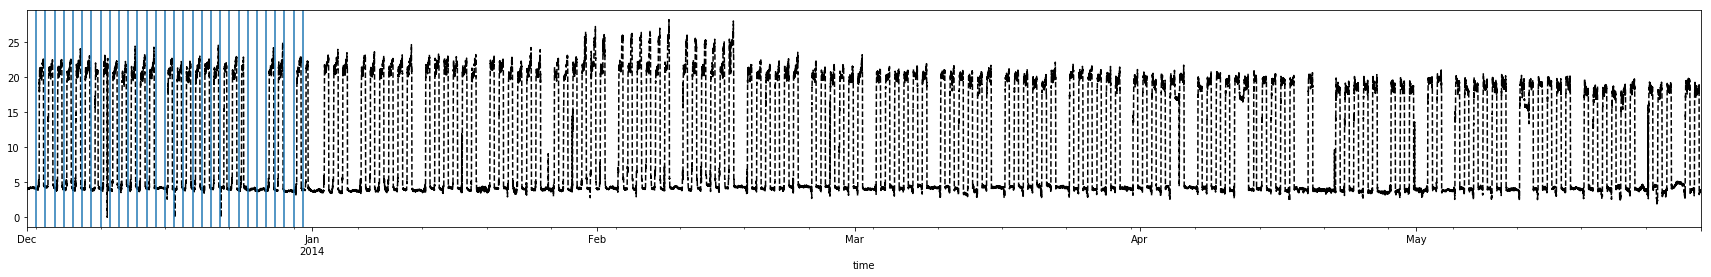

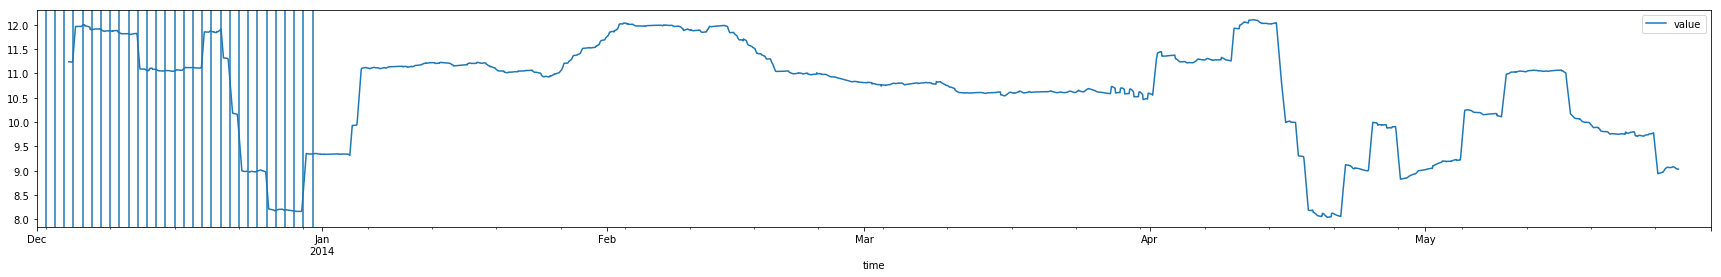

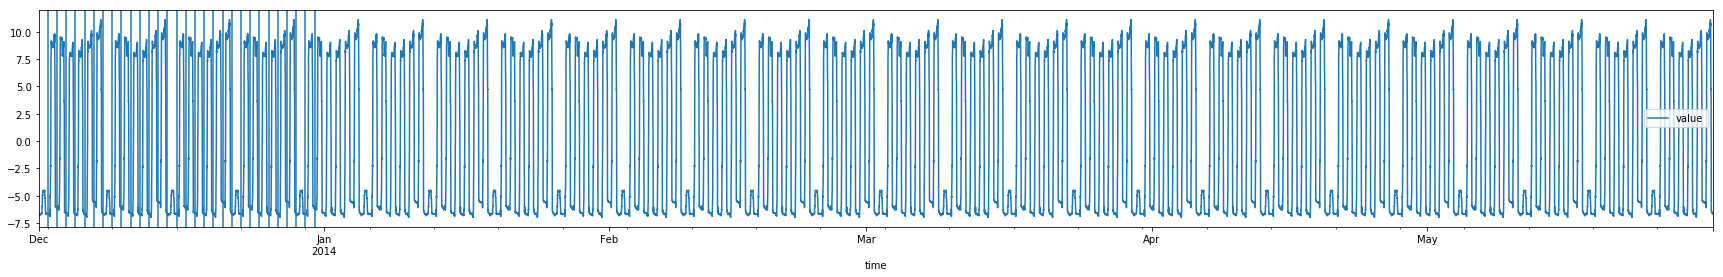

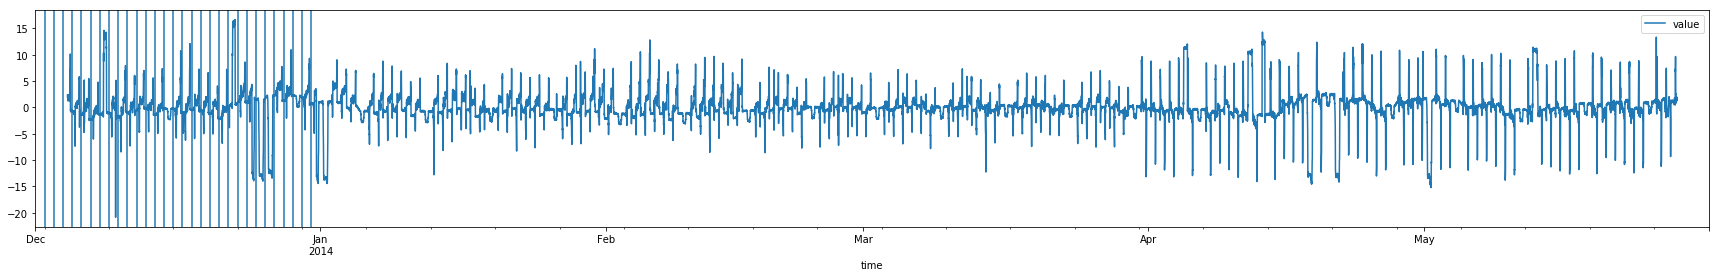

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
#ax = data.loc['20121203':'20121210']['value'].plot(figsize=(30, 4),style='k--')
ax = data['value'].plot(figsize=(30, 4),style='k--')
j = 0
for i in range(1,31):
    j = j + 144
    plt.axvline(x=data.index[j])
#data['new_col'].plot(ax = ax)
res = seasonal_decompose(data, model='additive', freq = 144*7)
fig = plt.figure() 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 4
res.trend.plot()
j = 0
for i in range(1,31):
    j = j + 144
    fig = plt.axvline(x=data.index[j])
res.seasonal.plot()
j = 0
for i in range(1,31):
    j = j + 144
    fig = plt.axvline(x=data.index[j])
res.resid.plot() 
j = 0
for i in range(1,31):
    j = j + 144
    fig = plt.axvline(x=data.index[j])